<a href="https://colab.research.google.com/github/phuocthok18/BT_ANN/blob/main/BT_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-------BAI1: BAI TOAN DONG HOC THUAN CANH TAY ROBOT 2 BAC TU DO
import numpy as np
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt

wb = openpyxl.Workbook()
sheet = wb.active
sheet['A1'] = 'Px'
sheet['B1'] = 'Py'
sheet['C1'] = 'T1' # T1 la goc theta1
sheet['D1'] = 'T2' # T2 la goc theta2

L1 = 50
L2 = 40
r = 1;
pi = 3.14;

for T1 in range(0, 360, 1):
  for T2 in range(0, 270, 1):
      px = L1*np.cos(T1*pi/180) + L2*np.cos((T1+T2)*pi/180)
      py = L1*np.sin(T1*pi/180) + L2*np.sin((T1+T2)*pi/180)
      r = r+1;
      px_txt = sheet.cell(row= r, column= 1)
      px_txt.value= f'{px}'

      py_txt = sheet.cell(row= r, column= 2)
      py_txt.value= f'{py}'

      T1_txt = sheet.cell(row= r, column= 3)
      T1_txt.value= f'{T1}'

      T2_txt = sheet.cell(row= r, column= 4)
      T2_txt.value= f'{T2}'
wb.save('Baitap01.xlsx')
print('save file')

save file


          Px        Py            T1            T2
Px  1.000000 -0.000181  1.115555e-01  2.685273e-04
Py -0.000181  1.000000 -5.696826e-01  2.578081e-04
T1  0.111555 -0.569683  1.000000e+00  3.883620e-15
T2  0.000269  0.000258  3.883620e-15  1.000000e+00


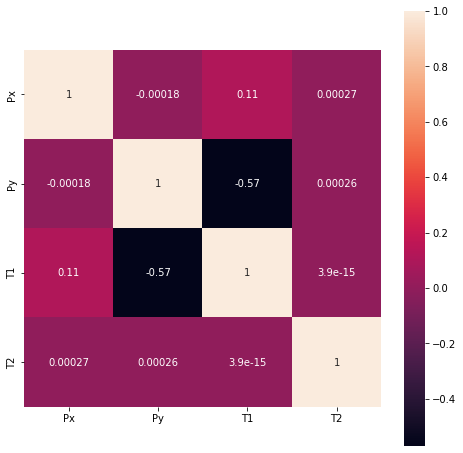

In [ ]:
data = pd.read_excel('Baitap01.xlsx')
corelations = data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corelations, annot= True, square = True)
print(corelations)

In [ ]:
from sklearn.preprocessing import StandardScaler

x = data.drop(['T1', 'T2'], axis= 1)
y = data.drop(['Px', 'Py'], axis= 1)
col_names = list(x.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(x)
X_df = pd.DataFrame(X_df, columns= col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Px,97200.0,1.064297e-15,1.000005,-2.229584,-0.665999,-0.000274,0.665912,2.230634
Py,97200.0,5.281098e-16,1.000005,-2.229415,-0.665685,-0.000081,0.665686,2.229625


In [ ]:
import keras
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.25, random_state = 7)
print(X_train.shape, X_test.shape)

(72900, 2) (24300, 2)


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
# Tao mo hinh
model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape = (2,)))
model.add(Dense(256, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(2, activation= 'softmax'))
model.summary()

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer = RMSprop(), metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)
print('Sai số kiểm tra: ', score[0])
print('Độ chính xác kiểm tra:', score[1])
model.save('Baitap01.h5')
y_pred = model.predict(X_test)
print(y_pred)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1536      
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)             (None, 2)                 202       
                                                                 
Total params: 158,766
Trainable params: 158,766
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


570/570 [==============================] - 6s 9ms/step - loss: 0.0043 - accuracy: 0.3861 - val_loss: 0.0038 - val_accuracy: 0.3719
Epoch 2/20
570/570 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.3747 - val_loss: 0.0067 - val_accuracy: 0.3787
Epoch 3/20
570/570 [==============================] - 5s 8ms/step - loss: 0.0038 - accuracy: 0.3663 - val_loss: 0.0040 - val_accuracy: 0.3635
Epoch 4/20
570/570 [==============================] - 5s 9ms/step - loss: 0.0037 - accuracy: 0.3625 - val_loss: 0.0035 - val_accuracy: 0.3460
Epoch 5/20
570/570 [==============================] - 5s 8ms/step - loss: 0.0037 - accuracy: 0.3606 - val_loss: 0.0036 - val_accuracy: 0.3642
Epoch 6/20
570/570 [==============================] - 6s 10ms/step - loss: 0.0037 - accuracy: 0.3553 - val_loss: 0.0038 - val_accuracy: 0.3226
Epoch 7/20
570/570 [==============================] - 5s 9ms/step - loss: 0.0037 - accuracy: 0.3379 - val_loss: 0.0035 - val_accuracy: 0.3475
Epoch 8/20
570/5

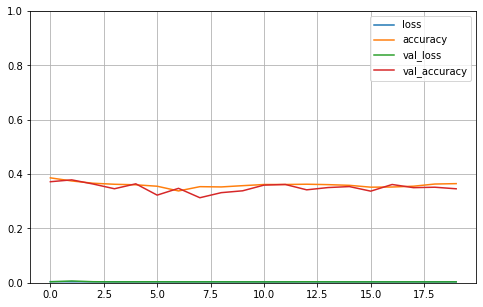

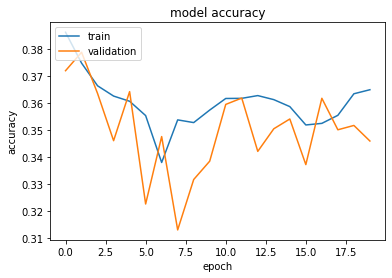

In [ ]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

In [ ]:
#----------BAI02: BAI TOAN DONG HOC THUAN CANH TAY ROBOT 3 BAC TU DO
import numpy as np
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt

wb = openpyxl.Workbook()
sheet = wb.active
sheet['A1'] = 'Px'
sheet['B1'] = 'Py'
sheet['C1'] = 'T1' # T1 la goc theta1
sheet['D1'] = 'T2' # T2 la goc theta2
sheet['E1'] = 'T3' # T3 la goc thata3
sheet['F1'] = 'Si' # Si = T1 + T2 + T3

L1 = 50
L2 = 40
L3 = 20
r = 1;
pi = 3.14;

for T1 in range(0, 360, 5):
  for T2 in range(0, 270, 5):
    for T3 in range(0, 270, 5):
      px = L1*np.cos(T1*pi/180) + L2*np.cos((T1+T2)*pi/180) + L3*np.cos((T1+T2+T3)*pi/180)
      py = L1*np.sin(T1*pi/180) + L2*np.sin((T1+T2)*pi/180) + L3*np.sin((T1+T2+T3)*pi/180)
      Si = T1 + T2 + T3
      r = r+1;
      px_txt = sheet.cell(row= r, column= 1)
      px_txt.value= f'{px}'

      py_txt = sheet.cell(row= r, column= 2)
      py_txt.value= f'{py}'

      T1_txt = sheet.cell(row= r, column= 3)
      T1_txt.value= f'{T1}'

      T2_txt = sheet.cell(row= r, column= 4)
      T2_txt.value= f'{T2}'

      T3_txt = sheet.cell(row= r, column= 5)
      T3_txt.value= f'{T3}'

      Si_txt = sheet.cell(row= r, column= 6)
      Si_txt.value= f'{Si}'
wb.save('Baitap02.xlsx')
print('save file')

save file


          Px        Py            T1            T2            T3        Si
Px  1.000000 -0.000127  6.996735e-02  2.274206e-04 -5.475596e-05  0.048088
Py -0.000127  1.000000 -5.667175e-01  2.428231e-04  7.425072e-06 -0.388652
T1  0.069967 -0.566718  1.000000e+00 -4.697266e-15 -5.679007e-16  0.686022
T2  0.000227  0.000243 -4.697266e-15  1.000000e+00  2.126285e-16  0.514478
T3 -0.000055  0.000007 -5.679007e-16  2.126285e-16  1.000000e+00  0.514478
Si  0.048088 -0.388652  6.860216e-01  5.144776e-01  5.144776e-01  1.000000


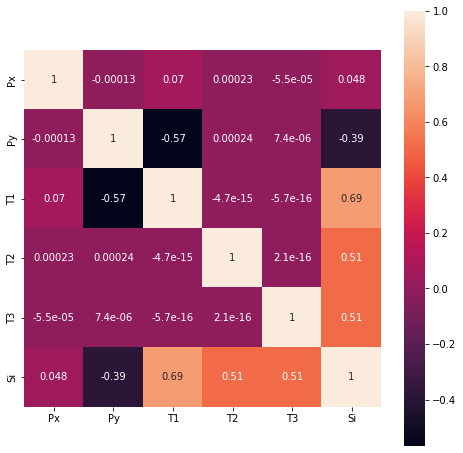

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data2 = pd.read_excel('Baitap02.xlsx')
corelations = data2.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corelations, annot= True, square= True)
print(corelations)

In [ ]:
from sklearn.preprocessing import StandardScaler

x2 = data2.drop(['T1', 'T2', 'T3'], axis= 1)
y2 = data2.drop(['Px', 'Py', 'Si'], axis= 1)
col_names= list(x2.columns)
s_scaler = StandardScaler()
x2_df = s_scaler.fit_transform(x2)
x2_df = pd.DataFrame(x2_df, columns= col_names)
x2_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Px,209952.0,1.472817e-15,1.000002,-2.688516,-0.699582,-0.000169,0.699753,2.689561
Py,209952.0,6.311357e-15,1.000002,-2.688280,-0.699717,-0.000048,0.699838,2.688415
Si,209952.0,-9.715086e-18,1.000002,-2.921333,-0.709702,0.000000,0.709702,2.921333


In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense , Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD

x_train, x_test, y_train, y_test = train_test_split(x2_df, y2, test_size = 0.25, random_state= 7)
print(x_train.shape, x_test.shape)

model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape = (3,)))
model.add(Dropout(0.2))
model.add(Dense(375, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(225, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(135, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation= 'softmax'))
model.summary()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer = RMSprop(), metrics = ['accuracy'])

history2 = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Sai số kiểm tra: ', score[0])
print('Độ chính xác kiểm tra:', score[1])
model.save('Baitap02.h5')
y_pred = model.predict(x_test)
print(y_pred)

(157464, 3) (52488, 3)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 512)               2048      
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_69 (Dense)            (None, 375)               192375    
                                                                 
 dropout_14 (Dropout)        (None, 375)               0         
                                                                 
 dense_70 (Dense)            (None, 225)               84600     
                                                                 
 dropout_15 (Dropout)        (None, 225)               0         
                                                                 
 dense_71 (Dense)            (

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1231/1231 [==============================] - 20s 16ms/step - loss: 0.0169 - accuracy: 0.2826 - val_loss: 0.0173 - val_accuracy: 0.2067
Epoch 2/10
1231/1231 [==============================] - 20s 16ms/step - loss: 0.0169 - accuracy: 0.2635 - val_loss: 0.0173 - val_accuracy: 0.1987
Epoch 3/10
1231/1231 [==============================] - 20s 16ms/step - loss: 0.0169 - accuracy: 0.2559 - val_loss: 0.0173 - val_accuracy: 0.1987
Epoch 4/10
1231/1231 [==============================] - 19s 15ms/step - loss: 0.0169 - accuracy: 0.2590 - val_loss: 0.0173 - val_accuracy: 0.1987
Epoch 5/10
1231/1231 [==============================] - 19s 16ms/step - loss: 0.0169 - accuracy: 0.2558 - val_loss: 0.0173 - val_accuracy: 0.1987
Epoch 6/10
1231/1231 [==============================] - 20s 16ms/step - loss: 0.0169 - accuracy: 0.2561 - val_loss: 0.0173 - val_accuracy: 0.1987
Epoch 7/10
1231/1231 [==============================] - 20s 16ms/step - loss: 0.0169 - accuracy: 0.2573 - val_loss: 0.0173 - val_accura

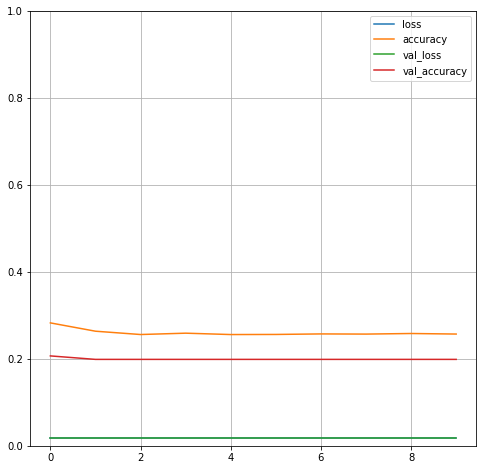

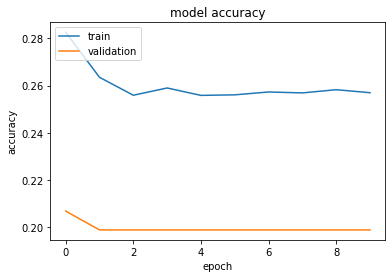

In [ ]:
pd.DataFrame(history2.history).plot(figsize= (8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()